In [317]:
%matplotlib notebook

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import plotly.express as px



In [2]:
rivers = gpd.read_file('data_files/Files_for_analysis/Ire_Rivers_Canals.shp')
rivers = rivers.to_crs(epsg=2158)

counties = gpd.read_file('data_files/Files_for_analysis/Ire_Counties.shp')
counties = counties.to_crs(epsg=2158)

In [3]:
print (rivers.head())

    osm_id  code fclass                 river_name  \
0   728289  8101  river  River Lee (North Channel)   
1  3796935  8101  river               River Liffey   
2  3796937  8101  river               River Liffey   
3  3797126  8101  river               River Liffey   
4  3807687  8101  river               River Liffey   

                                            geometry  
0  LINESTRING (535119.833 5749818.182, 535351.088...  
1  LINESTRING (677438.170 5914069.375, 677501.776...  
2  LINESTRING (676583.852 5914469.270, 676608.282...  
3  LINESTRING (673703.522 5915594.051, 673776.918...  
4  LINESTRING (668749.743 5915008.535, 668855.275...  


In [4]:
for i, row in rivers.iterrows(): # iterate over each row in the GeoDataFrame
    rivers.loc[i, 'Length'] = row['geometry'].length # assign the row's geometry length to a new column, Length
    
print(rivers.head()) # print the updated GeoDataFrame to see the changes

    osm_id  code fclass                 river_name  \
0   728289  8101  river  River Lee (North Channel)   
1  3796935  8101  river               River Liffey   
2  3796937  8101  river               River Liffey   
3  3797126  8101  river               River Liffey   
4  3807687  8101  river               River Liffey   

                                            geometry       Length  
0  LINESTRING (535119.833 5749818.182, 535351.088...   475.820876  
1  LINESTRING (677438.170 5914069.375, 677501.776...   315.839240  
2  LINESTRING (676583.852 5914469.270, 676608.282...   223.339354  
3  LINESTRING (673703.522 5915594.051, 673776.918...   289.478224  
4  LINESTRING (668749.743 5915008.535, 668855.275...  1027.745203  


In [5]:
rivers.groupby(['river_name'])['Length'].sum() / 1000 # convert to km

river_name
Abberachrin River      4.294710
Abbert River          17.438383
Abbey                  2.234642
Abbey River            1.702755
Abbeyville             0.064456
                        ...    
Woodford River        18.008186
Woodland Pill          1.092285
Yellow River          78.551235
Yellow Water River     2.786378
reservoir link         0.347138
Name: Length, Length: 975, dtype: float64

In [6]:
print(counties.crs == rivers.crs) # test if the crs is the same for roads_itm and counties.

True


In [7]:
join = gpd.sjoin(rivers, counties) #, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

,osm_id_left,code_left,fclass_left,river_name,geometry,Length,index_right,osm_id_right,code_right,fclass_right,population,name,Field
0,728289,8101,river,River Lee (North Channel),"LINESTRING (535119.833 5749818.182, 535351.088...",475.820876,10,332631,1041,county,0,Cork,NaN
21,5363142,8101,river,Glashaboy River,"LINESTRING (540387.937 5755567.501, 540401.280...",1082.946002,10,332631,1041,county,0,Cork,NaN
151,27222356,8101,river,Blackwater,"LINESTRING (539390.278 5776696.087, 539436.766...",2590.135442,10,332631,1041,county,0,Cork,NaN
195,29421963,8101,river,Owenabue,"LINESTRING (529597.208 5739197.171, 529611.876...",129.940719,10,332631,1041,county,0,Cork,NaN
206,30082595,8101,river,Feale,"LINESTRING (489654.421 5792636.619, 489649.501...",1568.124690,10,332631,1041,county,0,Cork,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25203,845097310,8101,river,Colligan River,"LINESTRING (592280.516 5773546.452, 592318.660...",120.342723,5,283426,1041,county,0,Waterford,NaN
25204,845097311,8101,river,Colligan River,"LINESTRING (591966.672 5773448.907, 591985.975...",383.247465,5,283426,1041,county,0,Waterford,NaN
25205,845097312,8101,river,Colligan River,"LINESTRING (591937.856 5773463.382, 591966.672...",32.247384,5,283426,1041,county,0,Waterford,NaN
25206,845097313,8101,river,Colligan River,"LINESTRING (591751.910 5773758.278, 591776.103...",358.823964,5,283426,1041,county,0,Waterford,NaN


In [8]:
print (counties.head())

    osm_id  code  fclass  population         name  Field  \
0   334898  1041  county           0     Limerick    NaN   
1  1959598  1041  county           0  Londonderry    NaN   
2   335442  1041  county           0       Offaly    0.0   
3   335445  1041  county           0     Longford    NaN   
4   335443  1041  county           0    Roscommon    NaN   

                                            geometry  
0  POLYGON ((475234.167 5824747.850, 475684.690 5...  
1  MULTIPOLYGON (((601961.616 6091904.380, 601974...  
2  POLYGON ((561249.732 5891564.879, 561254.706 5...  
3  POLYGON ((563738.398 5942612.346, 563735.238 5...  
4  POLYGON ((511649.800 5946340.151, 511658.420 5...  


In [9]:
join_total = join['Length'].sum() # find the total length of roads in the join GeoDataFrame
print(join.groupby(['name', 'river_name'])['Length'].sum() / 1000) # summarize the road lengths by CountyName, Road_class

sum_rivers = rivers['Length'].sum()
print(sum_rivers / join_total) # check that the total length of roads is the same between both GeoDataFrames; this should be 1.

name     river_name      
Antrim   Agivey River         0.048506
         Altmore Burn         1.980271
         Artoge River         2.212109
         Ballyemon River      0.242972
         Ballylusk Bridge     0.017587
                               ...    
Wicklow  Slaney              29.360913
         Tomnaskela           3.983036
         Vartry              14.981879
         Vartry River         6.745804
         reservoir link       0.347138
Name: Length, Length: 1308, dtype: float64
0.8843982113731441


In [10]:
clipped = [] # initialize an empty list
for county in counties['name'].unique():
    tmp_clip = gpd.clip(rivers, counties[counties['name'] == county]) # clip the roads by county border
    for i, row in tmp_clip.iterrows():
        tmp_clip.loc[i, 'Length'] = row['geometry'].length # we have to update the length for any clipped roads
        tmp_clip.loc[i, 'name'] = county # set the county name for each road feature    
    clipped.append(tmp_clip) # add the clipped GeoDataFrame to the 

# pandas has a function, concat, which will combine (concatenate) a list of DataFrames (or GeoDataFrames)
# we can then create a GeoDataFrame from the combined DataFrame, as the combined DataFrame will have a geometry column.
clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped))
clip_total = clipped_gdf['Length'].sum()

# sum_rivers / clip_total # check that the total length of roads is the same between both GeoDataFrames; this should be close to 1.

In [11]:
print (clipped_gdf.head())

       osm_id  code fclass    river_name  \
11    4902084  8101  river       Shannon   
106  24656107  8101  river       Mulkear   
108  24741068  8101  river         Abbey   
110  24809661  8101  river  Groody River   
120  25614142  8101  river       Mulkear   

                                              geometry       Length      name  
11                      POINT (534310.433 5845025.328)     0.000000  Limerick  
106  LINESTRING (531830.916 5835799.813, 531841.854...   494.787422  Limerick  
108  LINESTRING (525073.662 5836721.682, 525127.781...  1024.099438  Limerick  
110  LINESTRING (531052.402 5832010.879, 531081.752...   217.997485  Limerick  
120  LINESTRING (532035.221 5834586.798, 531997.898...    84.010008  Limerick  


In [12]:
clipped_gdf

,osm_id,code,fclass,river_name,geometry,Length,name
11,4902084,8101,river,Shannon,POINT (534310.433 5845025.328),0.000000,Limerick
106,24656107,8101,river,Mulkear,"LINESTRING (531830.916 5835799.813, 531841.854...",494.787422,Limerick
108,24741068,8101,river,Abbey,"LINESTRING (525073.662 5836721.682, 525127.781...",1024.099438,Limerick
110,24809661,8101,river,Groody River,"LINESTRING (531052.402 5832010.879, 531081.752...",217.997485,Limerick
120,25614142,8101,river,Mulkear,"LINESTRING (532035.221 5834586.798, 531997.898...",84.010008,Limerick
...,...,...,...,...,...,...,...
25278,866048949,8101,river,Elatagh River,"LINESTRING (566188.708 6082116.627, 566178.526...",1272.767608,Donegal
25279,866048955,8101,river,Elatagh River,"LINESTRING (566431.451 6082131.427, 566429.009...",55.354321,Donegal
25280,866048957,8101,river,Elatagh River,"LINESTRING (568403.152 6082313.753, 568397.770...",10.218183,Donegal
25358,910886748,8101,river,Deele River,"LINESTRING (580076.190 6080364.983, 580088.972...",12.804653,Donegal


In [238]:
print (clipped_gdf.groupby('name') [['Length']].sum()/1000)

total_rivers_per_county = (clipped_gdf.groupby('name') [['Length']].sum()/1000)

#print (clipped_gdf.groupby(['name']) ['Length'].sum() / 1000)

#total_rivers_per_county = (clipped_gdf.groupby(['name']) ['Length'].sum() / 1000)


                  Length
name                    
Antrim        475.543934
Armagh        267.030802
Carlow        240.079065
Cavan         406.338946
Clare         538.189847
Cork         1278.710932
Donegal       886.085923
Down          398.615421
Dublin        176.858715
Fermanagh     638.479279
Galway        950.546514
Kerry         739.618939
Kildare       256.081190
Kilkenny      362.245145
Laois         282.571542
Leitrim       417.419953
Limerick      483.035618
Londonderry   447.210708
Longford      165.146606
Louth         166.710099
Mayo         1129.136472
Meath         338.414124
Monaghan      218.460748
Offaly        352.672207
Roscommon     535.124828
Sligo         457.071977
Tipperary     689.884299
Tyrone        771.157737
Waterford     422.113182
Westmeath     201.852484
Wexford       562.679661
Wicklow       403.625419


In [239]:
total_rivers_per_county.head()

,Length
name,
Antrim,475.543934
Armagh,267.030802
Carlow,240.079065
Cavan,406.338946
Clare,538.189847


<IPython.core.display.Javascript object>


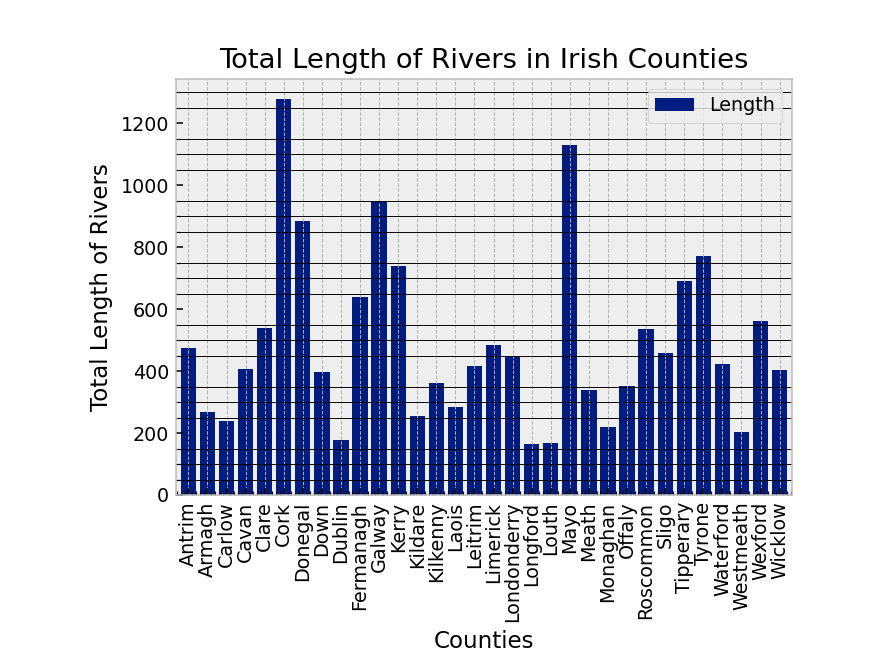

<function matplotlib.pyplot.show(block=None)>

In [327]:
# Draw a vertical bar chart


fig = total_rivers_per_county.plot(kind='bar', width=0.8, rot=90, title="Total Length of Rivers in Irish Counties")

plt.style.use('seaborn-dark-palette')
plt.minorticks_on()
plt.grid(which='both', axis='y', linestyle='-', linewidth='0.5', color='black')
plt.xlabel('Counties')
plt.ylabel('Total Length of Rivers')


plt.subplots_adjust(bottom = 0.25, left = 0.2)

plt.show


In [328]:
chart = fig.get_figure()
chart.savefig("Total Length of rivers in Irish Counties.png", transparent=True, dpi=300)


In [ ]:
#